In [1]:
#dertemination of the latitude of the HdA,Heidelberg using 
#a universal instrument on the sun

#createde by 

#import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from BREITENGRAD import *
from numpy import cos

In [2]:
#import data
h = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[0] )
m = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[1] )
s = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[2])

d_a_ = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[3] )
a_m_a = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[4] )
a_s_a = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[5])

d_b_ = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[6] )
a_m_b = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[7] )
a_s_b = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Daten_Sonne.txt', usecols=[8])

#unit change
hh = h+m/60+s/60/60

d_a=d_a_+a_m_a/60+a_s_a/60/60

d_b=d_b_+a_m_b/60+a_s_b/60/60


print('HH:MM:SS to HH')
print(hh)
print()
print('A:', d_a, '°')
print()
print('B:', d_b, '°')
print()

print('A in deg norm B:')
d_a = (d_a+180)%360
print(d_a, '°')
print()

#mean of A and B namend Z 
print('means')

Z=[]
cnt=0
while cnt<8:
    Z.append(np.abs(np.mean([d_a[cnt],d_b[cnt]])-180))
    cnt=cnt=cnt+1
print(Z, '°')

HH:MM:SS to HH
[ 12.49027778  12.65805556  12.77833333  12.87444444  13.16527778  13.2675
  13.46361111  13.57      ]

A: [  56.58055556   56.81111111  303.93333333  303.48611111  304.19166667
  303.64444444   55.925        56.56666667] °

B: [ 236.57222222  236.8         123.93611111  123.48611111  124.19444444
  123.63888889  235.92222222  236.56666667] °

A in deg norm B:
[ 236.58055556  236.81111111  123.93333333  123.48611111  124.19166667
  123.64444444  235.925       236.56666667] °

means
[56.576388888888886, 56.805555555555543, 56.065277777777766, 56.513888888888872, 55.80694444444444, 56.35833333333332, 55.923611111111114, 56.566666666666663] °


In [3]:
#calculation of index err
#load data

d_a_i_ = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Index.txt', usecols=[0] )
a_m_a_i = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Index.txt', usecols=[1] )
a_s_a_i = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Index.txt', usecols=[2])

d_b_i_ = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Index.txt', usecols=[3] )
a_m_b_i = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Index.txt', usecols=[4])
a_s_b_i = np.loadtxt(r'G:\Users\Thorben\Uni\Astro\Astrophysik\Index.txt', usecols=[5])

#unit change
d_a_i=d_a_i_+a_m_a_i/60+a_s_a_i/60/60

d_b_i=d_b_i_+a_m_b_i/60+a_s_b_i/60/60

print('index measurement')
print(d_a_i, '°')
print(d_b_i, '°')
print()


d_i_l = np.mean([d_a_i[0],d_b_i[0]])
d_i_r = np.mean([d_a_i[1],d_b_i[1]])

print('mean left')
print(d_i_l, '°')
print('mean right')
print(d_i_r, '°')
print()

IF_d = 0.5*(d_i_l+d_i_r-360)
IF_am = IF_d*60


print('index error')
print(IF_d , '°')
print(IF_am , 'arcmin')
print()



#corrections by index err
Z_1=[]
cnt=0
while cnt<8:
    if 1<cnt<6:
        Z_1.append(Z[cnt]+IF_d)
    else:
        Z_1.append(Z[cnt]-IF_d)
    cnt=cnt+1

print('corrected values')
print('Z_1:', Z_1, '°')
print()



#reduction to centre of the sun
sd=16/60+0.83/60/60
print('sun semi diameter:', sd,'°')
print()

Z_2=[]
cnt=0
while cnt<8:
    if cnt%2:
        Z_2.append(Z_1[cnt]-sd)
    else:
        Z_2.append(Z_1[cnt]+sd)
    cnt=cnt+1
print('sun centre')
print('Z_2:', Z_2, '°')

index measurement
[ 271.875        88.14166667] °
[  91.85833333  268.10833333] °

mean left
181.866666667 °
mean right
178.125 °

index error
-0.00416666666666 °
-0.25 arcmin

corrected values
Z_1: [56.580555555555549, 56.809722222222206, 56.061111111111103, 56.509722222222209, 55.802777777777777, 56.354166666666657, 55.927777777777777, 56.570833333333326] °

sun semi diameter: 0.26689722222222223 °

sun centre
Z_2: [56.847452777777768, 56.542824999999986, 56.328008333333322, 56.242824999999989, 56.069674999999997, 56.087269444444438, 56.194674999999997, 56.303936111111106] °


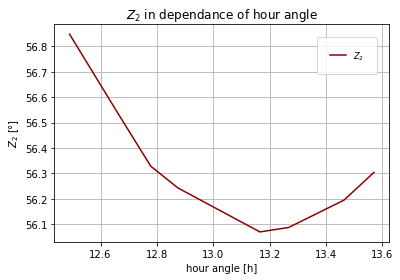

In [4]:
#plotting course of the sun against the time
plt.plot(hh, Z_2, color='darkred', label='$Z_2$')
plt.title('$Z_2$ in dependance of hour angle')
plt.ylabel('$Z_2$ [°]')
plt.xlabel('hour angle [h]')
plt.grid()
plt.legend(frameon=True,fontsize='small', borderpad=1.5, borderaxespad=1.5,loc='best')

In [5]:
#correction for refraction

T=273+15
P=1018

Z_2_rad=np.array(Z_2)*(1/180)*np.pi

R=0.0045*P*np.tan(Z_2_rad)/T

print('refraction:', R*180/np.pi, '°')
print()

Z_3=(Z_2_rad+R)*180/np.pi


print('Z_3:', Z_3, '°')


st(hh,Z_3)



refraction: [ 1.39522622  1.37915486  1.36797637  1.36357843  1.35469887  1.35559751
  1.36110113  1.36673155] °

Z_3: [ 58.242679    57.92197986  57.6959847   57.60640343  57.42437387
  57.44286695  57.55577613  57.67066767] °
T: [ 1.28837056  1.45614833  1.57642611  1.67253722  1.96337056  2.06559278
  2.26170389  2.36809278]
cost= [ 0.27868613  0.114397   -0.00562975 -0.10156546 -0.38256808 -0.47485252
 -0.63723687 -0.71546989]
dec= -6.53775
a: [ 0.27687385  0.11365308 -0.00559314 -0.10090499 -0.38008026 -0.47176458
 -0.63309296 -0.71081723]
b: -0.113857815684
Z_4: [ 58.24060426  57.91991235  57.69392231  57.60434308  57.42231768
  57.44081034  57.55371694  57.66860585]
c= [ 0.52635336  0.53110414  0.53444201  0.53576279  0.53844259  0.53817059
  0.53650866  0.53481541]
a+c= [ 0.80322722  0.64475722  0.52884886  0.4348578   0.15836233  0.06640601
 -0.0965843  -0.17600181]
x= [        nan         nan         nan         nan         nan         nan
 -2.49529796 -2.09094798]
phi= [    

C:\Users\Thorben\Desktop\BREITENGRAD.py:32: RuntimeWarning: invalid value encountered in sqrt
  x=(b+np.sqrt(a**2+b**2-c**2))/(a+c)


ValueError: cannot convert float NaN to integer

In [ ]:

# imp.import_module(BREITENGRAD)
